# ##Baseball Case Study##

# Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

Input features:

Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

Output:

Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

# Importing Required Libraries

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import zscore

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,r2_score,classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler,power_transform
from sklearn.svm import SVC

warnings.filterwarnings('ignore')

# Laoding dataset

In [13]:
df=pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [15]:
df.shape

(30, 17)

In [16]:
df.columns

Index(['winner', 'runs', 'at bats', 'hit', 'double', 'triple', 'homerun',
       'Walks', 'Strikeouts', 'Stolen Bases', 'Runs Allowed', 'Earned Runs',
       'Earned Run Average (ERA)', 'Complete Games', 'Shutouts', 'save',
       'error'],
      dtype='object')

# columns rename


In [14]:
final_data = df.rename({'W':'winner', 'R':'runs', 'AB':'at bats', 'H':'hit', '2B':'double', '3B':'triple', 'HR':'homerun', 'BB':'Walks', 'SO':'Strikeouts', 'SB':'Stolen Bases', 'RA':'Runs Allowed', 'ER':'Earned Runs',
       'ERA':'Earned Run Average (ERA)', 'CG':'Complete Games', 'SHO':'Shutouts', 'SV':'save', 'E':'error'},axis=1, inplace=True)

In [17]:
df.head()

,winner,runs,at bats,hit,double,triple,homerun,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shutouts,save,error
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [18]:
#find the shape
df.shape

(30, 17)

In [19]:
#check the null value
df.isnull().sum()

winner                      0
runs                        0
at bats                     0
hit                         0
double                      0
triple                      0
homerun                     0
Walks                       0
Strikeouts                  0
Stolen Bases                0
Runs Allowed                0
Earned Runs                 0
Earned Run Average (ERA)    0
Complete Games              0
Shutouts                    0
save                        0
error                       0
dtype: int64

no null value present in our data



In [20]:
#check the datatypes
df.dtypes

winner                        int64
runs                          int64
at bats                       int64
hit                           int64
double                        int64
triple                        int64
homerun                       int64
Walks                         int64
Strikeouts                    int64
Stolen Bases                  int64
Runs Allowed                  int64
Earned Runs                   int64
Earned Run Average (ERA)    float64
Complete Games                int64
Shutouts                      int64
save                          int64
error                         int64
dtype: object

no obeject in our dataset



all features form numeric form



In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   winner                    30 non-null     int64  
 1   runs                      30 non-null     int64  
 2   at bats                   30 non-null     int64  
 3   hit                       30 non-null     int64  
 4   double                    30 non-null     int64  
 5   triple                    30 non-null     int64  
 6   homerun                   30 non-null     int64  
 7   Walks                     30 non-null     int64  
 8   Strikeouts                30 non-null     int64  
 9   Stolen Bases              30 non-null     int64  
 10  Runs Allowed              30 non-null     int64  
 11  Earned Runs               30 non-null     int64  
 12  Earned Run Average (ERA)  30 non-null     float64
 13  Complete Games            30 non-null     int64  
 14  Shutouts    

same count number check all featurs same length



In [22]:
df.describe()


,winner,runs,at bats,hit,double,triple,homerun,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shutouts,save,error
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


check the statistic analysis



In [23]:
df.head()


,winner,runs,at bats,hit,double,triple,homerun,Walks,Strikeouts,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average (ERA),Complete Games,Shutouts,save,error
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [24]:
df.columns


Index(['winner', 'runs', 'at bats', 'hit', 'double', 'triple', 'homerun',
       'Walks', 'Strikeouts', 'Stolen Bases', 'Runs Allowed', 'Earned Runs',
       'Earned Run Average (ERA)', 'Complete Games', 'Shutouts', 'save',
       'error'],
      dtype='object')

In [25]:
#independent features = [ 'runs', 'at bats', 'hit', 'double', 'triple', 'homerun',
#       'Walks', 'Strikeouts', 'Stolen Bases', 'Runs Allowed', 'Earned Runs',
#       'Earned Run Average (ERA)', 'Complete Games', 'Shutouts', 'save',
 #      'error']

#dependent featuresor target or predicion variable = 'winner' 


#analysis predict the contineous variable that is regression problem

# visulization analysis


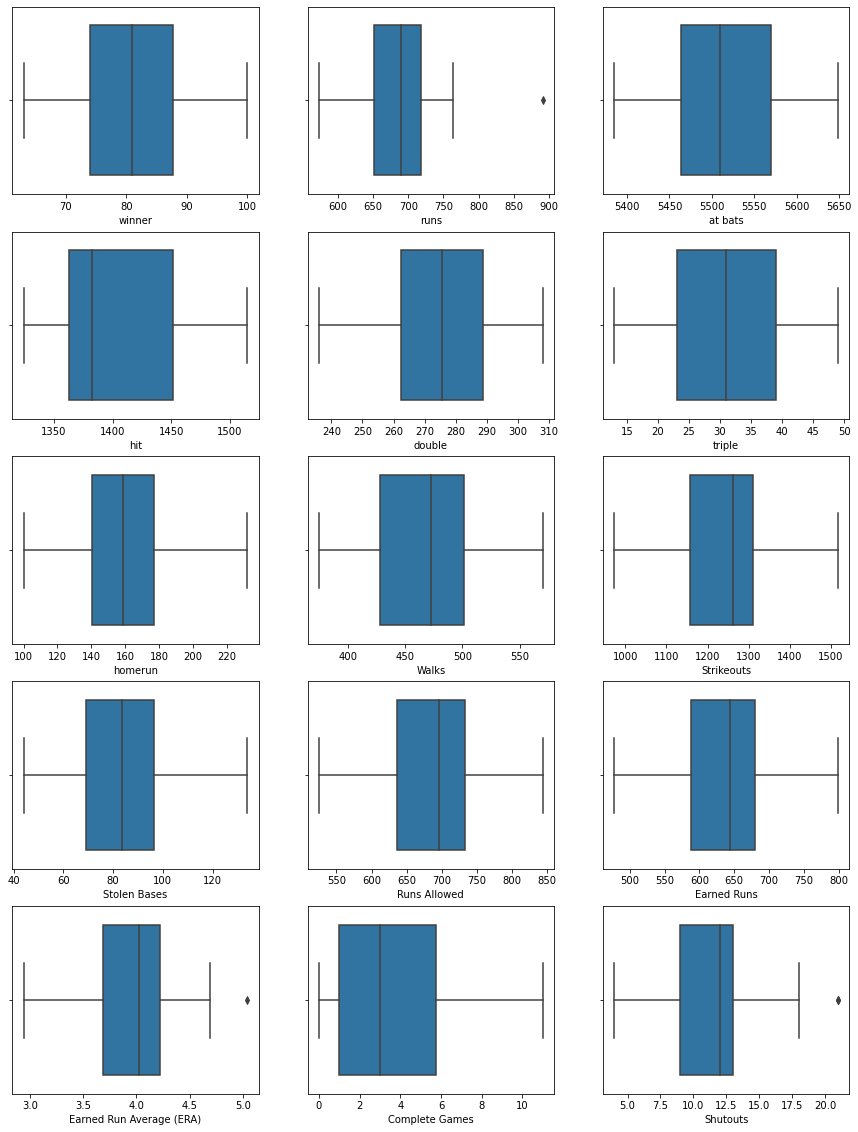

In [26]:
plt.figure(figsize=(15,20))
graph = 1
for column in df:
    if graph<=15:
        ax = plt.subplot(5,3,graph)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=10)
        
        
        
        graph+=1
plt.show()

In [27]:
df['save'].describe()

count    30.000000
mean     43.066667
std       7.869335
min      28.000000
25%      37.250000
50%      42.000000
75%      46.750000
max      62.000000
Name: save, dtype: float64

In [28]:
df['Shutouts'].describe()

count    30.000000
mean     11.300000
std       4.120177
min       4.000000
25%       9.000000
50%      12.000000
75%      13.000000
max      21.000000
Name: Shutouts, dtype: float64

no outliers present



In [29]:
x = df.drop(['winner'],axis=1)
y = df['winner']

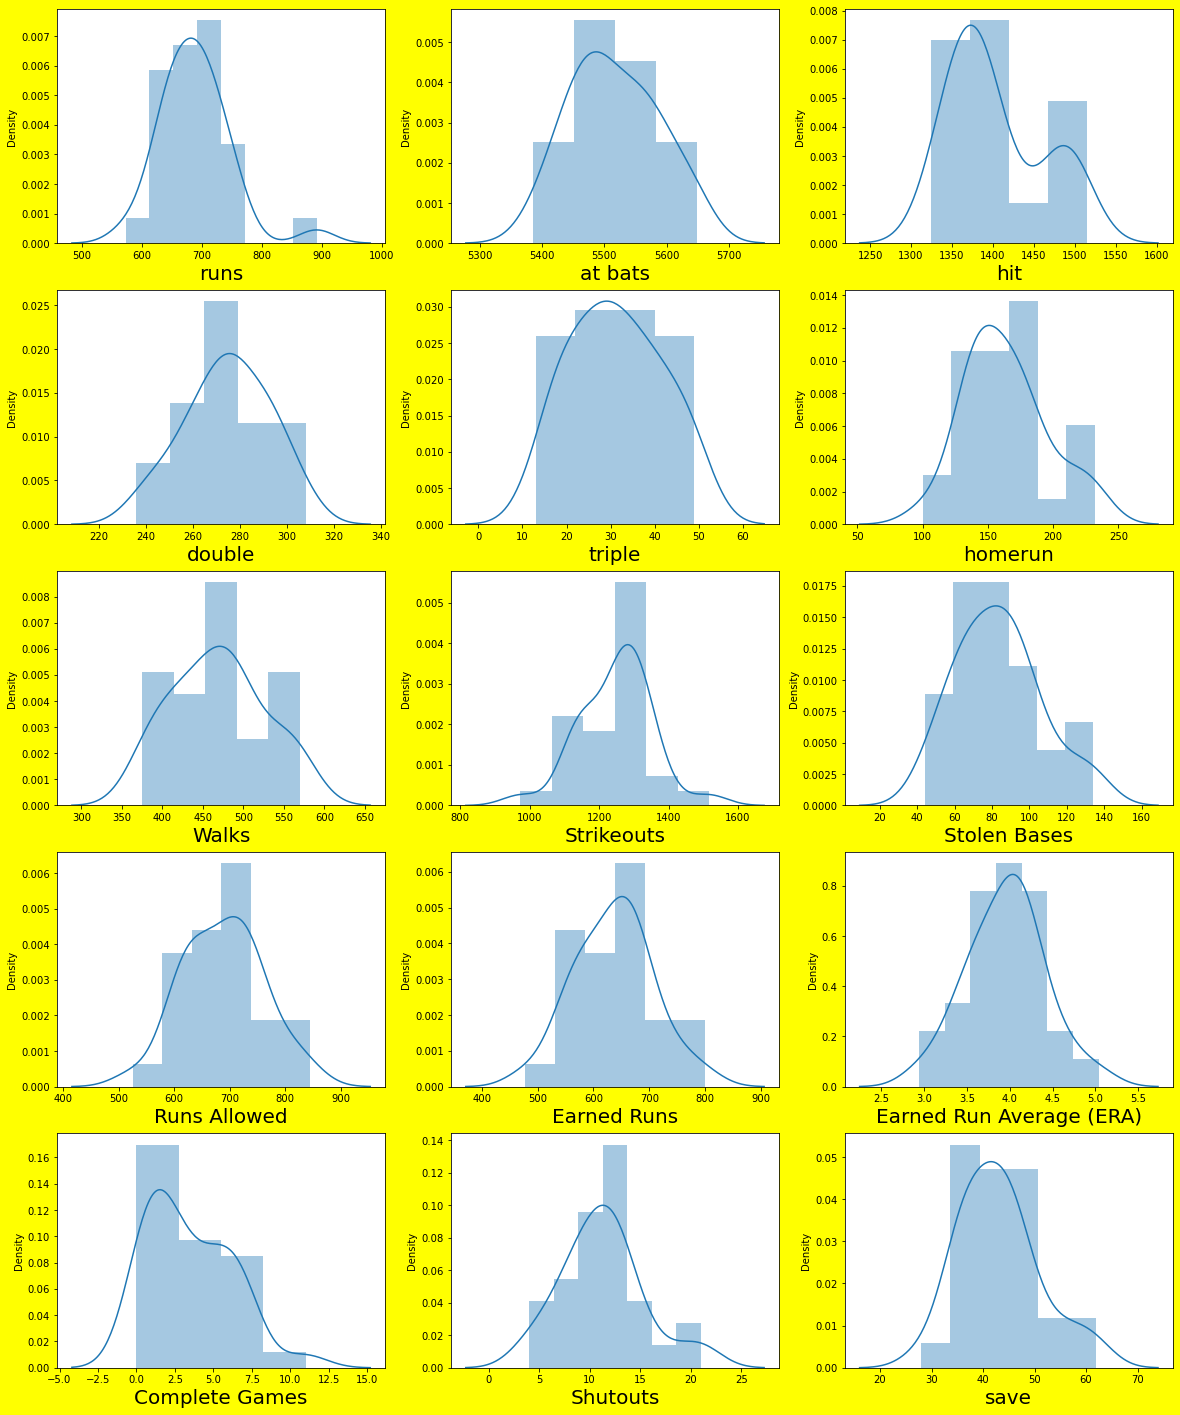

In [30]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber = 1
for column in x:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
        
        
        plotnumber+=1
plt.show()

In [31]:
x.skew()

runs                        1.200786
at bats                     0.183437
hit                         0.670254
double                     -0.230650
triple                      0.129502
homerun                     0.516441
Walks                       0.158498
Strikeouts                 -0.156065
Stolen Bases                0.479893
Runs Allowed                0.045734
Earned Runs                 0.058710
Earned Run Average (ERA)    0.053331
Complete Games              0.736845
Shutouts                    0.565790
save                        0.657524
error                       0.890132
dtype: float64

In [32]:
x.skew().sort_values(ascending=False)


runs                        1.200786
error                       0.890132
Complete Games              0.736845
hit                         0.670254
save                        0.657524
Shutouts                    0.565790
homerun                     0.516441
Stolen Bases                0.479893
at bats                     0.183437
Walks                       0.158498
triple                      0.129502
Earned Runs                 0.058710
Earned Run Average (ERA)    0.053331
Runs Allowed                0.045734
Strikeouts                 -0.156065
double                     -0.230650
dtype: float64

In [33]:
sk = x.skew()


In [34]:
sk[np.abs(sk)>0.5]


runs              1.200786
hit               0.670254
homerun           0.516441
Complete Games    0.736845
Shutouts          0.565790
save              0.657524
error             0.890132
dtype: float64

In [35]:
from sklearn.preprocessing import power_transform


In [36]:
x_new = power_transform(x)
x_new

array([[ 0.        ,  0.        ,  0.        ,  1.47768528,  1.03310301,
        -0.76462586, -1.61091476, -2.56989562,  0.93970819, -0.66033096,
        -0.49742469, -0.50089346, -0.35984364, -0.78957937,  1.546378  ,
        -0.3349525 ],
       [ 0.        ,  0.        ,  0.        ,  0.08426878,  1.2033202 ,
        -0.15858141, -0.50274883,  0.13491294, -0.53969308,  0.17546536,
         0.25797351,  0.26180619, -0.35984364,  0.25177537,  0.36044386,
        -0.53221128],
       [ 0.        ,  0.        ,  0.        ,  1.67078208, -0.16026987,
        -0.68967629,  1.1282937 , -0.90125379,  0.2119555 , -0.67462053,
        -0.74690639, -0.63645949,  1.99351257, -0.24539345, -0.6075936 ,
        -1.34233137],
       [ 0.        ,  0.        ,  0.        , -0.84859969, -0.36052064,
        -0.8790486 , -1.18120722, -0.1896282 , -0.64256433,  0.18951225,
         0.11357524,  0.06080381,  1.22010317, -0.51075929, -0.76445333,
         0.67852361],
       [ 0.        ,  0.        ,  0

In [37]:
x.columns


Index(['runs', 'at bats', 'hit', 'double', 'triple', 'homerun', 'Walks',
       'Strikeouts', 'Stolen Bases', 'Runs Allowed', 'Earned Runs',
       'Earned Run Average (ERA)', 'Complete Games', 'Shutouts', 'save',
       'error'],
      dtype='object')

In [38]:
x = pd.DataFrame(x_new,columns = x.columns)


In [39]:
x.skew().sort_values(ascending=False)


error                       0.063909
Strikeouts                  0.041170
Shutouts                    0.006560
Earned Run Average (ERA)    0.001746
save                        0.000836
runs                        0.000000
at bats                     0.000000
hit                         0.000000
homerun                    -0.000065
Earned Runs                -0.001940
Walks                      -0.007760
Runs Allowed               -0.008082
Stolen Bases               -0.010455
double                     -0.035315
Complete Games             -0.059785
triple                     -0.072933
dtype: float64

In [40]:
dk = x.skew()


In [41]:
dk[np.abs(dk)<0.5]


runs                        0.000000
at bats                     0.000000
hit                         0.000000
double                     -0.035315
triple                     -0.072933
homerun                    -0.000065
Walks                      -0.007760
Strikeouts                  0.041170
Stolen Bases               -0.010455
Runs Allowed               -0.008082
Earned Runs                -0.001940
Earned Run Average (ERA)    0.001746
Complete Games             -0.059785
Shutouts                    0.006560
save                        0.000836
error                       0.063909
dtype: float64

In [42]:
x.skew()[np.abs(x.skew())>0.5].all()


True

# feature selection


# using select kbest feature selection method


In [43]:
from sklearn.feature_selection import SelectKBest,f_classif


In [44]:
x = df.drop(['winner'],axis=1)
y = df['winner']

In [45]:
best_features = SelectKBest(score_func=f_classif,k=13)
fit = best_features.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(df.columns)

In [46]:
feature_scores = pd.concat([df_scores,df_columns],axis=1)
feature_scores.columns = ['Score','Feature_Name']#put the column nme

In [47]:
print(feature_scores.nlargest(13,'Score'))

       Score    Feature_Name
0   4.325471          winner
8   3.145176      Strikeouts
14  2.966365        Shutouts
9   2.420967    Stolen Bases
15  2.403946            save
11  1.665038     Earned Runs
10  1.574876    Runs Allowed
1   1.552727            runs
7   1.509218           Walks
13  1.204067  Complete Games
6   1.048384         homerun
5   0.989166          triple
3   0.904863             hit


In [48]:
new_x = df[['winner','Strikeouts','Shutouts','Stolen Bases','save','Walks','Earned Runs','Runs Allowed',
           'runs','Complete Games','homerun','triple','hit']]

In [49]:
new_x


,winner,Strikeouts,Shutouts,Stolen Bases,save,Walks,Earned Runs,Runs Allowed,runs,Complete Games,homerun,triple,hit
0,95,973,8,104,56,383,601,641,724,2,139,42,1497
1,83,1264,12,70,45,439,653,700,696,2,156,44,1349
2,81,1157,10,86,38,533,584,640,669,11,141,29,1395
3,76,1231,9,68,37,404,643,701,622,7,136,27,1381
4,74,1259,12,83,35,455,746,803,689,7,151,49,1515
5,93,1151,10,88,34,570,609,670,891,7,232,17,1480
6,87,1227,4,63,48,554,652,698,764,3,212,19,1397
7,81,1331,10,44,43,418,646,693,713,0,217,20,1370
8,80,1310,12,87,60,436,604,642,644,1,167,32,1383
9,78,1148,10,71,40,478,694,753,748,3,161,33,1495


In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

In [51]:
x_scaler = scaler.fit_transform(new_x)


In [52]:
for i in range(20):
     x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size=0.20,random_state=i)

print(y_test)

13    76
3     76
23    67
6     87
18    68
25    92
Name: winner, dtype: int64


In [53]:
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size=0.25,random_state=41)

# linear model


In [54]:
from sklearn.linear_model import LinearRegression


In [55]:
lr = LinearRegression()

In [56]:
lr.fit(x_train,y_train)

LinearRegression()

In [57]:
lr.score(x_train,y_train)


1.0

In [58]:
lr.score(x_test,y_test)


1.0

In [59]:
y_pred = lr.predict(x_test)


In [60]:
y_pred

array([86., 68., 88., 90., 84., 93., 63., 68.])

In [61]:
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [62]:
y_pred = lr.predict(x_test)
mean_absolute_error(y_test,y_pred)
mean_squared_error(y_test,y_pred)
np.sqrt(mean_squared_error(y_test,y_pred))

1.7404671430534633e-14

# lassocv model


In [63]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
lassocv = LassoCV(alphas = None,max_iter=100,normalize=True)
lassocv.fit(x_train,y_train)
alpha = lassocv.alpha_
lasso_reg = Lasso(alpha)

In [64]:
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_test,y_test)

0.9999999512199881

# ridge model


In [65]:
ridgecv = RidgeCV(alphas = np.arange(0.0001,0.1,0.001),normalize=True)
ridgecv.fit(x_train,y_train)
ridgecv.alpha_
ridge_model = Ridge(alpha=ridgecv.alpha_)

In [66]:
ridge_model.fit(x_train,y_train)
ridge_model.score(x_test,y_test)

0.9999999974565964

# random forest model


In [67]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
rf = RandomForestRegressor()

In [69]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [70]:
rf.score(x_test,y_test)

0.9545455301455301

In [71]:
rf.score(x_train,y_train)

0.9899885865629332

In [72]:
y_pred = rf.predict(x_test)
mean_absolute_error(y_test,y_pred)
mean_squared_error(y_test,y_pred)
np.sqrt(mean_squared_error(y_test,y_pred))

2.337926431691127

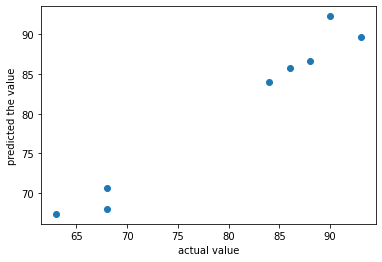

In [73]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual value')
plt.ylabel('predicted the value')
plt.show()

In [74]:
from sklearn.metrics import r2_score

In [75]:
r2_score(y_test,y_pred)


0.9545455301455301

conclusion random forest regressor model is good and good accuracy and mean_absolute_error is less linear regression

